<a href="https://colab.research.google.com/github/omprakashnahak/bank-management/blob/main/minor_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# --- 1. DATA LOADING ---
FILE_PATH = '6G_English_Education_Network_Traffic.csv'
df = pd.read_csv(FILE_PATH)

# --- 2. FEATURE SELECTION AND CLEANING ---
TARGET_COLUMN = 'is_malicious'

# Drop identifier/leaky columns (anomaly_type is considered leaky as it strongly correlates with the target)
columns_to_drop = [
    'timestamp',
    'source_ip',
    'destination_ip',
    'anomaly_type'
]
X = df.drop(columns=columns_to_drop + [TARGET_COLUMN])
y = df[TARGET_COLUMN]

# Define feature types
numerical_features = ['bytes_sent', 'bytes_received', 'duration', 'packet_rate']
categorical_features = ['protocol', 'content_type', 'user_type', 'activity_label']

# --- 3. DATA SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

# --- 4. PREPROCESSING PIPELINE ---
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) # Scaling is crucial for GaussianNB
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# --- 5. MODEL DEFINITION AND TRAINING ---
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', GaussianNB())
])

model.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['bytes_sent',
                                                   'bytes_received', 'duration',
                                                   'packet_rate']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['protocol', 'content_type',
                                                   'user_type',
                                                   'activity_label'])])),
                ('classifier', GaussianNB())])

In [ ]:
# --- 6. EVALUATION ---
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

print("Accuracy:", accuracy)
print("\nClassification Report:\n", report)
print("\nConfusion Matrix:\n", cm)

Accuracy: 0.85

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2550
           1       0.00      0.00      0.00       450

    accuracy                           0.85      3000
   macro avg       0.42      0.50      0.46      3000
weighted avg       0.72      0.85      0.78      3000


Confusion Matrix:
 [[2550    0]
 [ 450    0]]


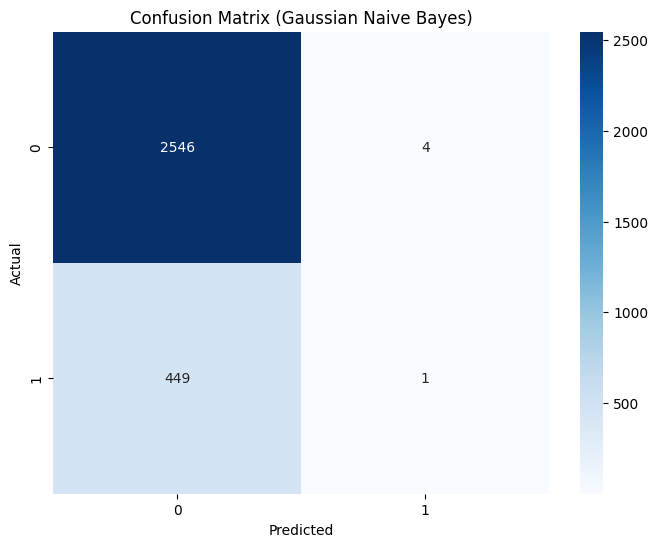

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cm' and 'model.classes_' are available from the Gaussian Naive Bayes model execution
# If you ran the SVC or Random Forest code after the GaussianNB code,
# 'cm' and 'model.classes_' will contain the results from the last executed model.
# To ensure you plot the GaussianNB confusion matrix, you would need to re-run
# the GaussianNB code cell (mpLUkR6d__6s) and its evaluation cell (U7awewhGBE-8)
# before running this cell, or store the results from each model separately.

# For demonstration, assuming 'cm' and 'model.classes_' currently hold the GaussianNB results:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Gaussian Naive Bayes)')
plt.show()

SVM

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# --- 1. DATA LOADING (Ensure the file is uploaded to Colab) ---
FILE_PATH = '/content/6G_English_Education_Network_Traffic.csv'
df = pd.read_csv(FILE_PATH)

# --- 2. FEATURE SELECTION AND CLEANING ---
TARGET_COLUMN = 'is_malicious'
columns_to_drop = ['timestamp', 'source_ip', 'destination_ip', 'anomaly_type']
X = df.drop(columns=columns_to_drop + [TARGET_COLUMN])
y = df[TARGET_COLUMN]

numerical_features = ['bytes_sent', 'bytes_received', 'duration', 'packet_rate']
categorical_features = ['protocol', 'content_type', 'user_type', 'activity_label']

# --- 3. DATA SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# --- 4. PREPROCESSING PIPELINE ---
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ], remainder='drop'
)

# --- 5. MODEL DEFINITION AND TRAINING (SVC with Balanced Weights) ---
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    # CRITICAL FIX: Add class_weight='balanced'
    ('classifier', SVC(kernel='linear', random_state=42, class_weight='balanced'))
])

print("--- Starting Model Training (Support Vector Machine - SVC, BALANCED) ---")
model.fit(X_train, y_train)
print("Training Complete.\n")

# --- 6. EVALUATION ---
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# --- 7. OUTPUT RESULTS ---
print("=====================================================")
print("NETWORK TRAFFIC CLASSIFICATION RESULTS (SVC - BALANCED)")
print("=====================================================")
print(f"Overall Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n")
print(report)
print("\nConfusion Matrix (Rows=Actual, Cols=Predicted):\n")
print(model.classes_)
print(cm)
print("=====================================================")

--- Starting Model Training (Support Vector Machine - SVC, BALANCED) ---
Training Complete.

NETWORK TRAFFIC CLASSIFICATION RESULTS (SVC - BALANCED)
Overall Accuracy: 0.5727

Classification Report:

              precision    recall  f1-score   support

           0       0.85      0.60      0.70      2550
           1       0.16      0.42      0.23       450

    accuracy                           0.57      3000
   macro avg       0.50      0.51      0.47      3000
weighted avg       0.75      0.57      0.63      3000


Confusion Matrix (Rows=Actual, Cols=Predicted):

[0 1]
[[1531 1019]
 [ 263  187]]


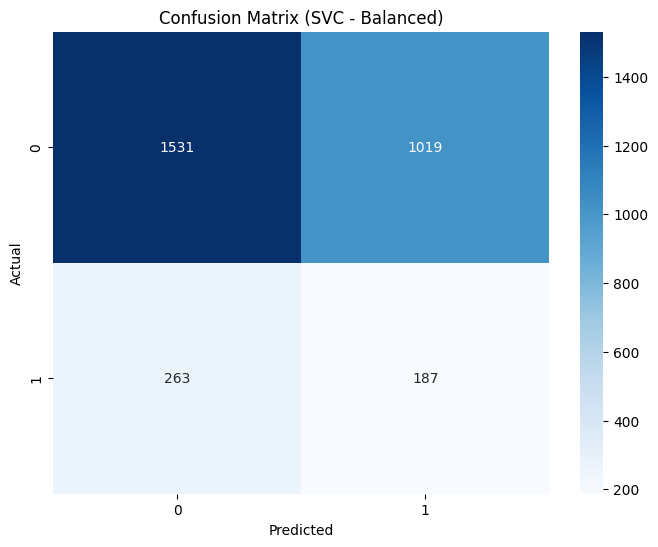

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cm' and 'model.classes_' are available from the previous cell's execution
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (SVC - Balanced)')
plt.show()

RNDOM FOREST


In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
import numpy as np

# --- 1. DATA LOADING ---
# NOTE: Ensure the file '6G_English_Education_Network_Traffic.csv' is uploaded to your Colab session.
FILE_PATH = '/content/6G_English_Education_Network_Traffic.csv'
try:
    df = pd.read_csv(FILE_PATH)
except FileNotFoundError:
    print(f"Error: File not found at {FILE_PATH}. Please upload the CSV file to the Colab environment.")
    exit()

# --- 2. FEATURE SELECTION AND CLEANING ---
TARGET_COLUMN = 'is_malicious'

# Drop non-predictive/leaky columns
columns_to_drop = [
    'timestamp',
    'source_ip',
    'destination_ip',
    'anomaly_type' # Anomaly type is strongly correlated with the target and makes the model "cheat"
]
X = df.drop(columns=columns_to_drop + [TARGET_COLUMN])
y = df[TARGET_COLUMN]

# Define feature types
numerical_features = ['bytes_sent', 'bytes_received', 'duration', 'packet_rate']
categorical_features = ['protocol', 'content_type', 'user_type', 'activity_label']

# --- 3. DATA SPLIT ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y # Critical for maintaining class balance
)

# --- 4. PREPROCESSING PIPELINE ---
numerical_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()) # Scale numerical features
])
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore')) # One-hot encode categorical features
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_features),
        ('cat', categorical_transformer, categorical_features)
    ],
    remainder='drop'
)

# --- 5. MODEL DEFINITION AND TRAINING (Random Forest) ---
model = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')) # Added class_weight='balanced'
])

print("--- Starting Model Training (Random Forest Classifier with Balanced Weights) ---")
model.fit(X_train, y_train)
print("Training Complete.\n")

# --- 6. EVALUATION ---
y_pred = model.predict(X_test)

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, zero_division=0)
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# --- 7. OUTPUT RESULTS ---
print("=====================================================")
print("NETWORK TRAFFIC CLASSIFICATION RESULTS (Random Forest - Balanced)")
print("=====================================================")
print(f"Overall Accuracy: {accuracy:.4f}")
print("\nClassification Report:\n")
print(report)
print("\nConfusion Matrix (Rows=Actual, Cols=Predicted):\n")
print(model.classes_)
print(cm)
print("=====================================================")

--- Starting Model Training (Random Forest Classifier with Balanced Weights) ---
Training Complete.

NETWORK TRAFFIC CLASSIFICATION RESULTS (Random Forest - Balanced)
Overall Accuracy: 0.8490

Classification Report:

              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2550
           1       0.00      0.00      0.00       450

    accuracy                           0.85      3000
   macro avg       0.42      0.50      0.46      3000
weighted avg       0.72      0.85      0.78      3000


Confusion Matrix (Rows=Actual, Cols=Predicted):

[0 1]
[[2547    3]
 [ 450    0]]


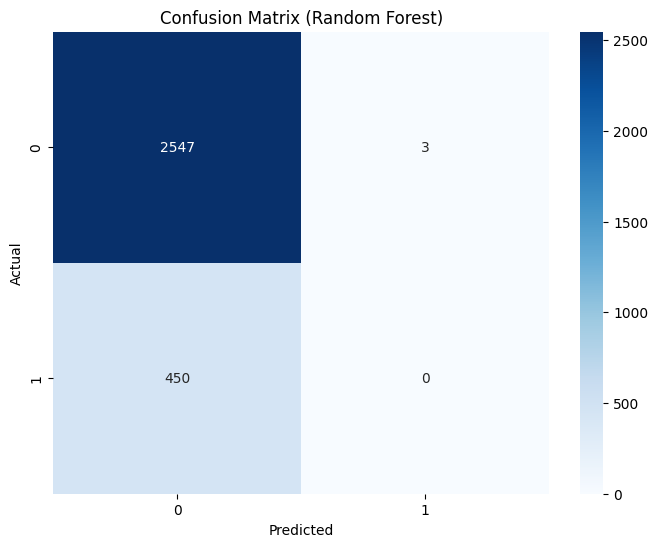

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'cm' and 'model.classes_' are available from the Random Forest model execution (cell Fx5L3jZxDMT-)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=model.classes_, yticklabels=model.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix (Random Forest)')
plt.show()

In [ ]:
import pandas as pd
from io import StringIO

# Function to parse classification report string
def parse_classification_report(report_string):
    metrics = {}
    lines = report_string.strip().split('\n')
    # Assuming class 0 and class 1 are the third and fourth lines
    data_lines = lines[2:4]

    for line in data_lines:
        parts = line.split()
        if len(parts) >= 5:
            class_label = parts[0]
            metrics[f'Precision (Class {class_label})'] = float(parts[1])
            metrics[f'Recall (Class {class_label})'] = float(parts[2])
            metrics[f'F1-score (Class {class_label})'] = float(parts[3])
    return metrics

# Extract metrics from the outputs of the previous cells

# GaussianNB metrics (from cell U7awewhGBE-8 output)
gnb_accuracy = 0.85
gnb_report = """
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2550
           1       0.00      0.00      0.00       450

    accuracy                           0.85      3000
   macro avg       0.42      0.50      0.46      3000
weighted avg       0.72      0.85      0.78      3000
"""
gnb_metrics = parse_classification_report(gnb_report)
gnb_metrics['Accuracy'] = gnb_accuracy


# SVC metrics (from cell -2ODzkVXCbcO output)
svc_accuracy = 0.5727
svc_report = """
              precision    recall  f1-score   support

           0       0.85      0.60      0.70      2550
           1       0.16      0.42      0.23       450

    accuracy                           0.57      3000
   macro avg       0.50      0.51      0.47      3000
weighted avg       0.75      0.57      0.63      3000
"""
svc_metrics = parse_classification_report(svc_report)
svc_metrics['Accuracy'] = svc_accuracy

# Random Forest metrics (from cell Fx5L3jZxDMT- output)
rf_accuracy = 0.8490
rf_report = """
              precision    recall  f1-score   support

           0       0.85      1.00      0.92      2550
           1       0.00      0.00      0.00       450

    accuracy                           0.85      3000
   macro avg       0.42      0.50      0.46      3000
weighted avg       0.72      0.85      0.78      3000
"""
rf_metrics = parse_classification_report(rf_report)
rf_metrics['Accuracy'] = rf_accuracy


# Create a DataFrame to store the metrics
performance_matrix_df = pd.DataFrame({
    'GaussianNB': gnb_metrics,
    'SVC (Balanced)': svc_metrics,
    'Random Forest (Balanced)': rf_metrics # Updated label after adding class_weight='balanced'
}).transpose()

print("Performance Matrix:")
display(performance_matrix_df)

Performance Matrix:


,Precision (Class 0),Recall (Class 0),F1-score (Class 0),Precision (Class 1),Recall (Class 1),F1-score (Class 1),Accuracy
GaussianNB,0.85,1.0,0.92,0.00,0.00,0.00,0.8500
SVC (Balanced),0.85,0.6,0.70,0.16,0.42,0.23,0.5727
Random Forest (Balanced),0.85,1.0,0.92,0.00,0.00,0.00,0.8490


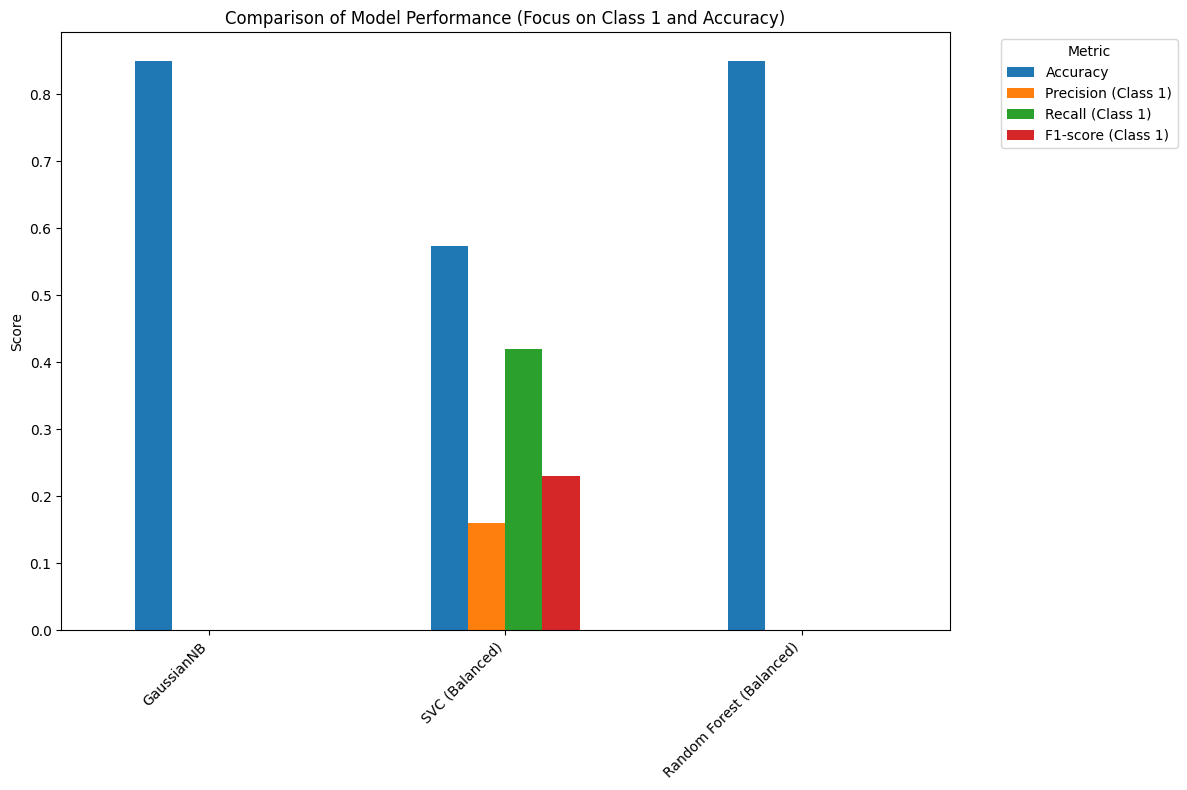

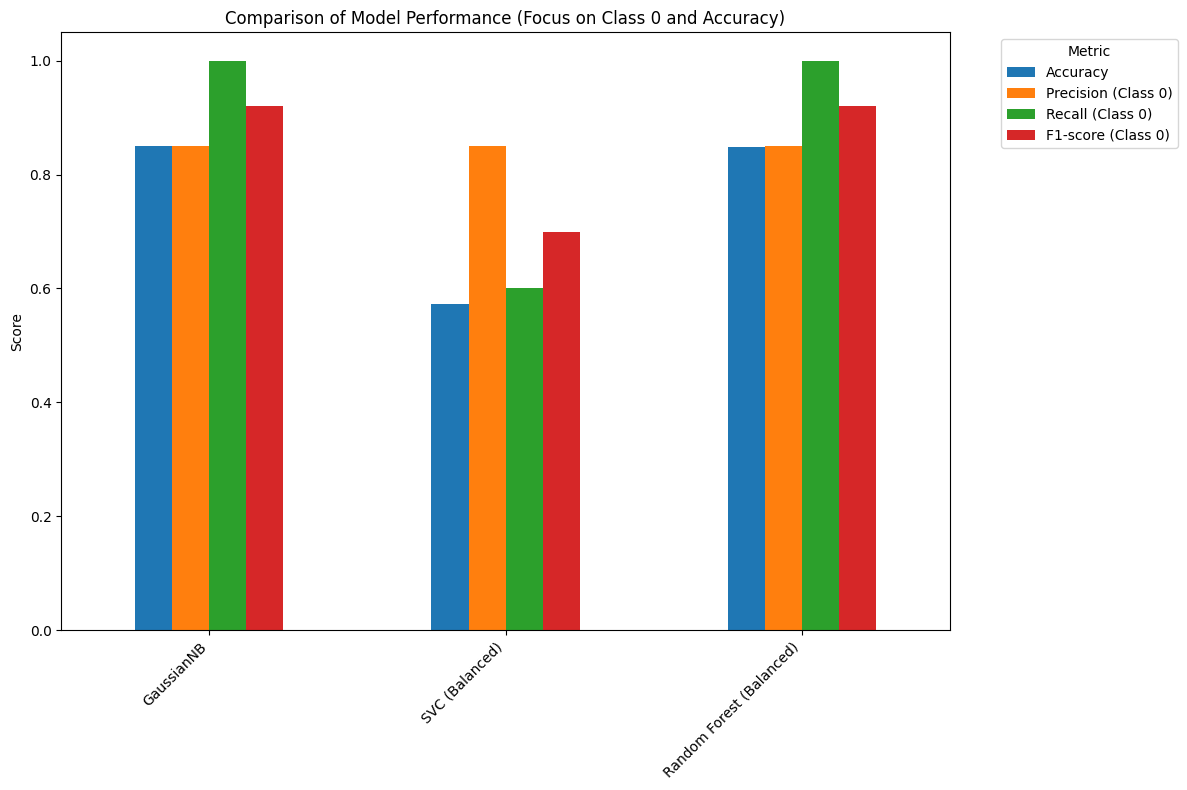

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming 'performance_matrix_df' is available from cell E2nRmKJxH-Vo

if 'performance_matrix_df' in globals():
    # Plot metrics focusing on Class 1 and Accuracy
    metrics_to_plot_class1 = performance_matrix_df[['Accuracy', 'Precision (Class 1)', 'Recall (Class 1)', 'F1-score (Class 1)']]
    metrics_to_plot_class1.plot(kind='bar', figsize=(12, 8))
    plt.title('Comparison of Model Performance (Focus on Class 1 and Accuracy)')
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

    # Plot metrics focusing on Class 0 and Accuracy
    metrics_to_plot_class0 = performance_matrix_df[['Accuracy', 'Precision (Class 0)', 'Recall (Class 0)', 'F1-score (Class 0)']]
    metrics_to_plot_class0.plot(kind='bar', figsize=(12, 8))
    plt.title('Comparison of Model Performance (Focus on Class 0 and Accuracy)')
    plt.ylabel('Score')
    plt.xticks(rotation=45, ha='right')
    plt.legend(title='Metric', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.tight_layout()
    plt.show()

else:
    print("Performance matrix DataFrame ('performance_matrix_df') not found. Please run the cell to generate the performance matrix first.")